<a href="https://colab.research.google.com/github/hy30n80/Data-Structure-/blob/main/%5BRECITATION_02%5D_Hasing%2C_Binary_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference

[University of michigan](https://www.eecs.umich.edu/courses/eecs380/ALG/niemann/s_has.htm)


[University of Washington](https://courses.cs.washington.edu/courses/cse326/00wi/handouts/lecture16/sld015.htm)

[skilled.dev](https://skilled.dev/course/tree-traversal-in-order-pre-order-post-order)

## Hashing

### Chaining

Entries in the hash table are dynamically allocated and entered on a linked list associated with each hash table entry. This technique is known as chaining.

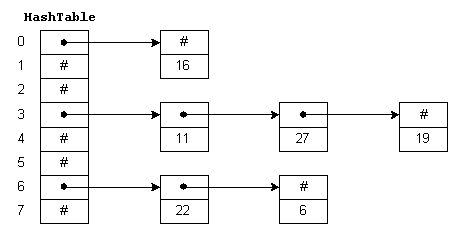

In [1]:
class Chaining:
    def __init__(self, size):
        self.size = size
        self.table = [[] for _ in range(size)]

    def hash_function(self, key):
        return hash(key) % self.size

    def insert(self, key, value):
        index = self.hash_function(key)
        for pair in self.table[index]:
            if pair[0] == key:
                pair[1] = value
                return
        self.table[index].append([key, value])

    def get(self, key):
        index = self.hash_function(key)
        for pair in self.table[index]:
            if pair[0] == key:
                return pair[1]
        raise KeyError(key)

    def delete(self, key):
        index = self.hash_function(key)
        for i, pair in enumerate(self.table[index]):
            if pair[0] == key:
                del self.table[index][i] #list 에서 element 제거하는 함수 "del"
                return
        raise KeyError(key)

In [3]:
# Create a hash table of size 5
table = Chaining(5)

# Insert some key-value pairs
table.insert('apple', 3)
table.insert('banana', 2)
table.insert('cherry', 5)

print("Insert result:", table.table)

# Retrieve some values by key
print("Retrieve some values by key - apple, banana")
print(table.get('apple'))   # Output: 3
print(table.get('banana'))  # Output: 2

# Update a value
table.insert('apple', 4)
print("Update result:", table.table)
print("Get value using key 'apple':", table.get('apple'))   # Output: 4

# Add some value
table.insert('mango', 7)
table.insert('melon', 1)
print("Add result:", table.table)

# Delete a key-value pair
table.delete('banana')
print("Delete result:", table.table)
try:
    table.get('banana')
except KeyError:
    print('Key "banana" not found')  # Output: Key "banana" not found

Insert result: [[['banana', 2]], [], [], [['apple', 3]], [['cherry', 5]]]
Retrieve some values by key - apple, banana
3
2
Update result: [[['banana', 2]], [], [], [['apple', 4]], [['cherry', 5]]]
Get value using key 'apple': 4
Add result: [[['banana', 2]], [], [], [['apple', 4], ['mango', 7], ['melon', 1]], [['cherry', 5]]]
Delete result: [[], [], [], [['apple', 4], ['mango', 7], ['melon', 1]], [['cherry', 5]]]
Key "banana" not found


In [4]:
print(hash('banana') % 5, hash('melon') % 5, hash('mango') % 5)

0 3 3


### Open address



when a collision occurs and the slot specified by the hash function is already occupied, the algorithm tries to store the value in the next available slot in the array, starting from the slot following the occupied slot.

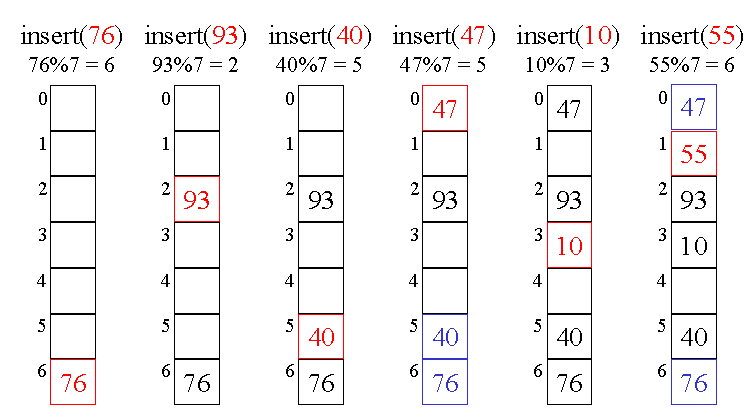

In [9]:
class OpenAddress:
    def __init__(self, size):
        self.size = size
        self.keys = [None] * size
        self.values = [None] * size

    def hash_function(self, key):
        return hash(key) % self.size

    #이거 계속 있으면 무한 루프 도는 거 아님? -> ㅋㅋ 맞네
    def insert(self, key, value):
        index = self.hash_function(key)
        while self.keys[index] is not None:
            if self.keys[index] == key:
                self.values[index] = value
                return
            index = (index + 1) % self.size

        self.keys[index] = key
        self.values[index] = value

    def get(self, key):
        index = self.hash_function(key)
        while self.keys[index] is not None:
            if self.keys[index] == key:
                return self.values[index]
            index = (index + 1) % self.size
        raise KeyError(key)

    def delete(self, key):
        index = self.hash_function(key)
        while self.keys[index] is not None:
            if self.keys[index] == key:
                self.keys[index] = None
                self.values[index] = None
                return
            index = (index + 1) % self.size
        raise KeyError(key)

In [10]:
# Create a hash table of size 5
table = OpenAddress(5)

# Insert some key-value pairs
table.insert('apple', 3)
table.insert('banana', 2)
table.insert('cherry', 5)


print("Insert result:", table.keys, table.values)

# Retrieve some values by key
print("Retrieve some values by key - apple, banana")
print(table.get('apple'))   # Output: 3
print(table.get('banana'))  # Output: 2

# Update a value
table.insert('apple', 4)
print("Update result:", table.keys, table.values)
print("Get value using key 'apple':", table.get('apple'))   # Output: 4

# Add some value
table.insert('mango', 7)
table.insert('melon', 1)
print("Add result:", table.keys, table.values)

# Delete a key-value pair
table.delete('banana')
print("Delete result:", table.keys, table.values)
try:
    table.get('banana')
except KeyError:
    print('Key "banana" not found')  # Output: Key "banana" not found

Insert result: ['banana', None, None, 'apple', 'cherry'] [2, None, None, 3, 5]
Retrieve some values by key - apple, banana
3
2
Update result: ['banana', None, None, 'apple', 'cherry'] [2, None, None, 4, 5]
Get value using key 'apple': 4
Add result: ['banana', 'mango', 'melon', 'apple', 'cherry'] [2, 7, 1, 4, 5]
Delete result: [None, 'mango', 'melon', 'apple', 'cherry'] [None, 7, 1, 4, 5]
Key "banana" not found


In [11]:
print(hash('banana')%5,hash('melon')%5, hash('mango')%5)

0 3 3


## Binary Tree

 a hierarchical data structure that consists of nodes connected by edges

* Topmost node in a tree is called the root, and it has no parent node.
* It has a branching structure, meaning that each node can have multiple children.
* A leaf node (also called a terminal node or external node) is a node that has no children. It is the end point of a branch and represents a data element in the tree


feature for binary tree

* Each node in a binary tree has at most two children: This means that each node can have either zero, one, or two child nodes. A node with zero children is called a leaf node, and a node with one or two children is called an internal node.

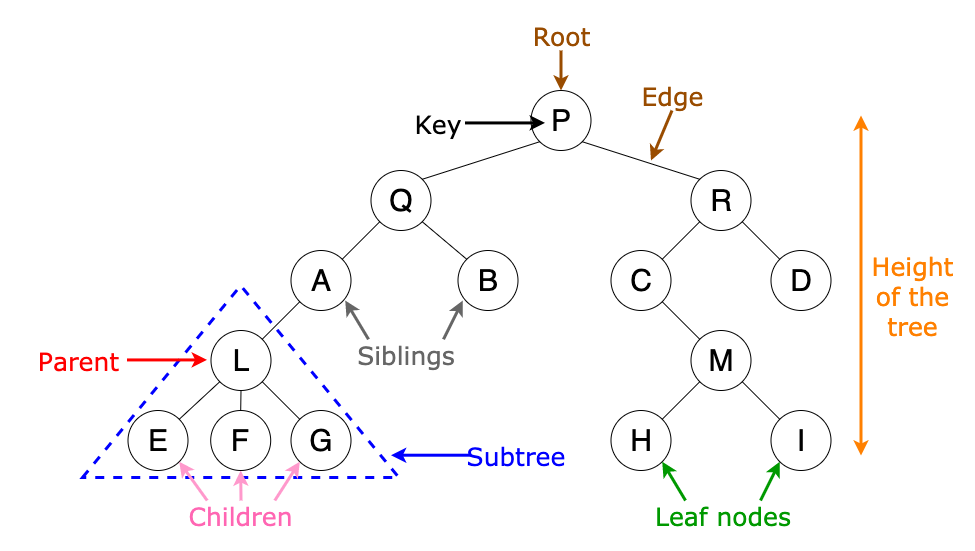

In [12]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [13]:
# Create some tree nodes
node1 = TreeNode('a')
node2 = TreeNode('b')
node3 = TreeNode('c')
node4 = TreeNode('d')
node5 = TreeNode('e')
node6 = TreeNode('f')

# Link the nodes together to create a binary tree
node1.left = node2
node1.right = node5
node2.left = node3
node2.right = node4
node5.right = node6

class review

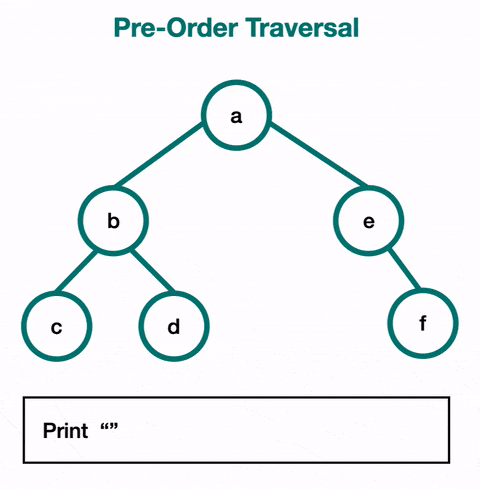

In [ ]:
def print_preorder(t):
    if t:
        print(t.val, end=" ")
        print_preorder(t.left)
        print_preorder(t.right)

In [14]:
def print_preorder(node):
  if node:
    print(node.val, end=" ")
    print_preorder(node.left)
    print_preorder(node.right)

In [15]:
print_preorder(node1)

a b c d e f 

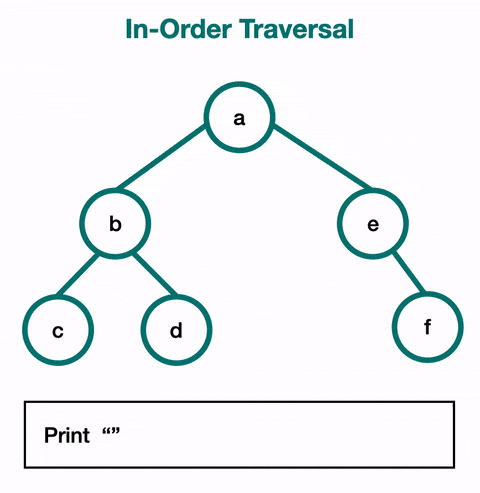

In [ ]:
def print_inorder(t):
    if t:
        print_inorder(t.left)
        print(t.val, end=" ")
        print_inorder(t.right)

In [18]:
def print_inorder(t):
  if t:
    print_inorder(t.left)
    print(t.val, end=" ")
    print_inorder(t.right)

In [19]:
print_inorder(node1)

c b d a e f 

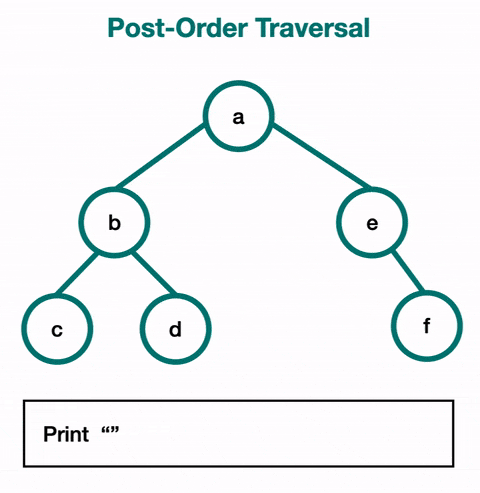

In [ ]:
def print_postorder(t):
    if t:
        print_postorder(t.left)
        print_postorder(t.right)
        print(t.val, end=" ")

In [20]:
def print_postorder(t):
  if t:
    print_postorder(t.left)
    print_postorder(t.right)
    print(t.val, end=" ")

In [21]:
print_postorder(node1)

c d b f e a 

## Quiz

### Q1. Two Sum

Given an array of integers nums and an integer target, return the indices of the two numbers that add up to target. You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order.

* Input: nums = [2,7,11,15], target = 9
* Output: [0,1]

nums[0] + nums[1] == 9, we return [0, 1].


In [24]:
import doctest

In [29]:
def twosum(nums, target):
    """
    Given an array of integers `nums` and an integer `target`,
    return the indices of the two numbers that add up to `target`.

    >>> twosum([2,7,11,15], 9)
    [0, 1]

    >>> twosum([3,2,4], 6)
    [1, 2]

    >>> twosum([3,3], 6)
    [0, 1]

    >>> twosum([1,2,3], 6)
    Traceback (most recent call last):
        ...
    ValueError: No two numbers add up to target
    """
    hash_table = {}
    # Your answer

    for i, num in enumerate(nums):
      complement = target - num
      if complement in hash_table.keys(): #dictionary 에서 key 찾는 거
        return [hash_table[complement], i]
      hash_table[num] = i

    raise ValueError('No two numbers add up to target')

In [30]:
doctest.run_docstring_examples(twosum, globals(), False, __name__)

### Q2. useful binary tree

In practical usage of binary tree, we can make binary tree with the below feature

* The left child of a node is smaller than the node, and the right child is larger: In a binary search tree, the values of the nodes follow a specific ordering, where the left child of a node is always smaller than the node itself, and the right child is always larger. This ordering makes it easy to search for a specific value in the tree, as you can follow the left or right branches based on the value you are looking for.

Please fill the blank with your code to make pre-sorted binary tree

In [41]:
class BinaryTree:
  def __init__(self, root=None):
    self.root = root

  def insert(self, val):
    if not self.root:
      self.root = TreeNode(val)
    else:
      self._insert(val, self.root)

  def _insert(self, val, node):
    # Your answer
    if val < node.val:
      if not node.left:
        node.left = TreeNode(val)
      else:
        self._insert(val, node.left)
    else:
      if not node.right:
        node.right = TreeNode(val)
      else:
        self._insert(val, node.right)

  def search(self, val):
    return self._search(val, self.root)

  def _search(self, val, node):
    # hint : use recursion as traversal
    # Your answer
    if not node:
      return False

    elif val == node.val:
      return True

    elif val < node.val:
      return self._search(val, node.left)

    elif val > node.val:
      return self._search(val, node.right)


In [43]:
class BinaryTree:
  def __init__(self, root=None):
    self.root = root

  def insert(self, val):
    if not self.root:
      self.root = TreeNode(val)
    else:
      self._insert(val, self.root)

  def _insert(self, val, node):
    if val < node.val:
      if not node.left:
        node.left = TreeNode(val)
      else:
        self._insert(val, node.left)

    else:
      if not node.right:
        node.right = TreeNode(val)
      else:
        self._insert(val, node.right)


  def search(self, val):
    return self._search(val, self.root)

  def _search(self, val, node):
    if not node:
      return False

    elif val == node.val:
      return True

    elif val < node.val:
      return self._search(val, node.left) #말단에서 발생하는 Return 값을 나한테 끌어올리려면 return 붙여야 함

    elif val > node.val:
      return self._search(val, node.right)

In [44]:
# Create a binary tree
tree = BinaryTree()

# Insert some values
tree.insert(5)
tree.insert(3)
tree.insert(7)
tree.insert(2)
tree.insert(4)
tree.insert(6)
tree.insert(8)

# Search for a value
print(tree.search(4))  # Output: True
print(tree.search(9))  # Output: False

True
False
